### Comparison of decision region plots obtained for the perceptron-based classier and linear kernel based SVM

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#### Loading datasets

In [2]:
df1 = pd.read_csv("../Datasets/LinearDataset/Class1.txt",delimiter=' ', header=None)
df2 = pd.read_csv("../Datasets/LinearDataset/Class2.txt",delimiter=' ', header=None)
df3 = pd.read_csv("../Datasets/LinearDataset/Class3.txt",delimiter=' ', header=None)

#### Dividing training and testing data

In [3]:
df1_train = df1[:int(len(df1)*0.7)]
df1_test = df1[int(len(df1)*0.7):]
df2_train = df2[:int(len(df2)*0.7)]
df2_test = df2[int(len(df2)*0.7):]
df3_train = df3[:int(len(df3)*0.7)]
df3_test = df3[int(len(df3)*0.7):]

#### Code for comparision

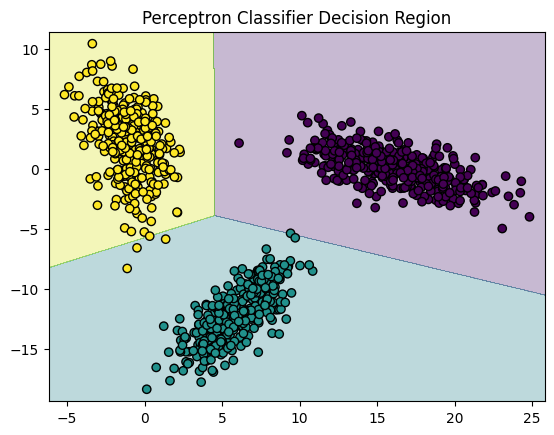

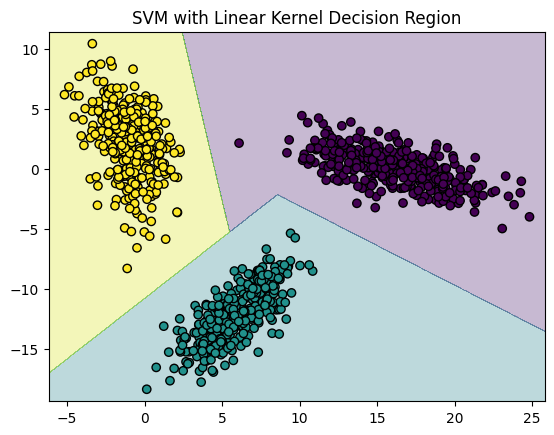

Perceptron Accuracy: 99.78%
SVM with Linear Kernel Accuracy: 100.00%


In [6]:
# Assuming df1, df2, and df3 are your class dataframes
# Combine the data (you should update this to match your LS dataset)
X_train = pd.concat([df1_train, df2_train, df3_train], axis=0).values  # Using the train data
y_train = np.array([0]*len(df1_train) + [1]*len(df2_train) + [2]*len(df3_train))  # Labels for 3 classes

X_test = pd.concat([df1_test, df2_test, df3_test], axis=0).values
y_test = np.array([0]*len(df1_test) + [1]*len(df2_test) + [2]*len(df3_test))

# Train the Perceptron model
perceptron_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron_model.fit(X_train, y_train)

# Train the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Function to plot decision regions
def plot_decision_regions(X, y, classifier, resolution=0.02, title="Decision Region"):
    # Set min and max values for each feature to create a meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Generate meshgrid for plotting decision boundaries
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Predict the class labels for each point in the meshgrid
    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Plot Decision Region for Perceptron Classifier
plot_decision_regions(X_train, y_train, perceptron_model, title="Perceptron Classifier Decision Region")

# Plot Decision Region for SVM with Linear Kernel
plot_decision_regions(X_train, y_train, svm_model, title="SVM with Linear Kernel Decision Region")

# Calculate accuracy for both classifiers on the test set
perceptron_accuracy = accuracy_score(y_test, perceptron_model.predict(X_test))
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))

print(f"Perceptron Accuracy: {perceptron_accuracy * 100:.2f}%")
print(f"SVM with Linear Kernel Accuracy: {svm_accuracy * 100:.2f}%")